# Data Analysis
In this specific notebook we will test our ```omega_simulate``` script to run trading simulations. 

We will combine that script with our other ```omega_analysis``` script to further analysis the distribution.

We are essentially looking for an ideal **threshold** measure along with **fair distribution** that is optimized at bringing returns. 

The reason for this is because we want our CNN to learn a good distribution, one which will create patterns enough for the eye to detect. 

In [1]:
from omega_simulate import *
# from omega_analysis import *
import os
import matplotlib.pyplot as plt

In [2]:
# filtering warning for testing
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
# importing our changes df
path = './post_processing/data_fluc/changes_1hr_USDGBP.csv'
changes_df = pd.read_csv(path)

## Distributions to test
We will test the following distributions: 

**Prediction Windows**
* 3hrs
* 6hrs
* 12hrs
* 24hrs
* 36hrs
* 48hrs

**Buy Thresholds**
* .002
* .005
* .01
* .02

**Sell Thresholds**
* 0.0
* -0.002
* -0.005
* -0.01
* -0.02

In [4]:
# Distributuons to test dict
test_dist = {
    'prediction_window': [3, 6, 12, 24, 36, 48],
    'buy_threshold': [0.002, 0.005, 0.01, 0.02],
    'sell_threshold': [0.0, -0.002, -0.005, -0.01, -0.02]
}

## Helper Function
We will create a quick helper function which will wrap around ```omega_simulate``` adding onto what is returned. This wrapper function will call the script directory and also return a histrogram along with frequency of trade with the given ```buy_threshold``` and ```sell_threshold```. 

This will allow for us to better analysis the trades and distribution without rewriting much code

In [5]:
# helper function
def analyze_distribution(sequence, buy_threshold, sell_threshold, start_cap, margin_trade=False, print_trades=False):
    # checking for margin trading
    if margin_trade:
        simulate_thresh_test_trade_best(sequence, buy_threshold, sell_threshold, start_cap, margin_trade=True, print_trades=False)
        
        # printing trades?
        if print_trades:
            simulate_thresh_test_trade_best(sequence, buy_threshold, sell_threshold, start_cap, margin_trade=True, print_trades=True)
    
    # printing trades?
    if print_trades:
        simulate_thresh_test_trade_best(sequence, buy_threshold, sell_threshold, start_cap, print_trades=True)
    
    # calling our simulation test - without margin trading and no print trading
    simulate_thresh_test_trade_best(sequence, buy_threshold, sell_threshold, start_cap, print_trades=False)
    
    # plotting our histrogram
    # grabbing our window size
    window_size = sequence.columns[2]
    
    try:
        plt.hist(sequence[window_size], bins=750, range=(-0.015, 0.015))
        plt.plot()
    except Exception:
        pass
    
def get_sequence(df_, window):
    """
    Getting our sequence provides the window
    """
    columns = ['open', 'close', str(window)]
    return df_[columns].copy()

# Testing

In [6]:
test_dist

{'prediction_window': [3, 6, 12, 24, 36, 48],
 'buy_threshold': [0.002, 0.005, 0.01, 0.02],
 'sell_threshold': [0.0, -0.002, -0.005, -0.01, -0.02]}

----------------------------------------
Buying
open     1.345040
close    1.338160
3       -0.009675
Name: 2983, dtype: float64
capital: 99994.79571
bought at: 1.34504
transaction cost: 5.20429
Sell threshold: 1.34504
bought 74343 shares


Selling
open     1.363430
close    1.367210
3       -0.000286
Name: 2999, dtype: float64
capital: 101356.75947
sold at: 1.36343
transaction cost: 5.20401
sold 74343 shares

----------------------------------------
Buying
open     1.212230
close    1.211640
3       -0.000421
Name: 4848, dtype: float64
capital: 101350.9067
bought at: 1.21223
transaction cost: 5.8527700000000005
Sell threshold: 1.21223
bought 83606 shares


Selling
open     1.218020
close    1.210680
3       -0.003624
Name: 5080, dtype: float64
capital: 101829.13302000002
sold at: 1.21802
transaction cost: 5.85242
sold 83606 shares

Starting capital: 100000
Ending capital: 101829.13302000002
Return on investment: 1%
Total Transaction cost: 22.11349
Starting capital: 100000
Ending capit

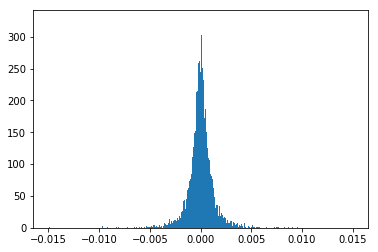

In [21]:
"""
Test A:
    Window = 3
    buy threshold = 0.01
    sell threshold = 0.01
    starting capital = 100000
"""

# our parameters: CHANGE THESE
window = 3
buy = 0.01
sell = 0.0
starting_cap = 100000

### ---------------TESTING-------------------###
# grabbing our sequence
sequence_ = get_sequence(changes_df, window)

# running our test
analyze_distribution(sequence_, buy, sell, starting_cap, print_trades=True)

In [8]:
sequence_.iloc[4848]

open     1.212230
close    1.211640
3       -0.000421
Name: 4848, dtype: float64

In [9]:
sequence_.iloc[6430 - 24]

open     1.216040
close    1.215780
3       -0.001068
Name: 6406, dtype: float64

In [10]:
sequence_.iloc[6429]

open     1.218800
close    1.218410
3        0.000057
Name: 6429, dtype: float64

In [11]:
sequence_.iloc[6430]

open     1.200170
close    1.204650
3       -0.015237
Name: 6430, dtype: float64

In [12]:
mask = sequence_.iloc[4848:]['open'] < sequence_.iloc[4848]['open']
mask_df = sequence_.iloc[4848:].copy()
mask_df[mask]

,open,close,3
4849,1.21174,1.22434,-0.000569
5081,1.21068,1.21328,-0.006075
6345,1.21220,1.21468,-0.002091
6370,1.21222,1.21309,-0.002666
6373,1.21158,1.21281,-0.000981
6375,1.21050,1.20713,-0.001905
6376,1.20708,1.21150,-0.002776
6377,1.21150,1.21589,0.003620
6430,1.20017,1.20465,-0.015237
6431,1.20465,1.20380,-0.011293


In [13]:
open_price = sequence_.iloc[4848]['open']

In [14]:
sell = 0.0

sell_threshold = open_price + (open_price * (-sell))

mask = sequence_.iloc[4848:]['open'] < sell_threshold
mask_df = sequence_.iloc[4848:].copy()
mask_df[mask]

,open,close,3
4849,1.21174,1.22434,-0.000569
5081,1.21068,1.21328,-0.006075
6345,1.21220,1.21468,-0.002091
6370,1.21222,1.21309,-0.002666
6373,1.21158,1.21281,-0.000981
6375,1.21050,1.20713,-0.001905
6376,1.20708,1.21150,-0.002776
6377,1.21150,1.21589,0.003620
6430,1.20017,1.20465,-0.015237
6431,1.20465,1.20380,-0.011293


In [15]:
sell_threshold = open_price + (open_price * (-sell))

In [16]:
open_price

1.21223

In [17]:
sell_threshold

1.21223

In [18]:
mask = sequence_.iloc[4848:]['open'] < sell_threshold
mask_df = sequence_.iloc[4848:].copy()
mask_df[mask]

,open,close,3
4849,1.21174,1.22434,-0.000569
5081,1.21068,1.21328,-0.006075
6345,1.21220,1.21468,-0.002091
6370,1.21222,1.21309,-0.002666
6373,1.21158,1.21281,-0.000981
6375,1.21050,1.20713,-0.001905
6376,1.20708,1.21150,-0.002776
6377,1.21150,1.21589,0.003620
6430,1.20017,1.20465,-0.015237
6431,1.20465,1.20380,-0.011293


In [19]:
sequence_.iloc[4849:4852]

,open,close,3
4849,1.21174,1.22434,-0.000569
4850,1.22434,1.22728,0.010482
4851,1.22734,1.22613,0.002450
